In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [120]:
# 讀取資料集
potential_customers = pd.read_csv('/Users/castle/Desktop/中研院/程式/potential_customers_data.csv')
non_potential_customers = pd.read_csv('/Users/castle/Desktop/中研院/程式/non_potential_customers_data.csv')

/Users/castle/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [121]:
# 基本摘要
potential_customers.info()
potential_customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475843 entries, 0 to 2475842
Data columns (total 28 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   u_userId              int64 
 1   u_phonePrice          int64 
 2   u_browserLifeCycle    int64 
 3   u_browserMode         int64 
 4   u_feedLifeCycle       int64 
 5   u_refreshTimes        int64 
 6   u_newsCatInterests    object
 7   u_newsCatDislike      object
 8   u_newsCatInterestsST  object
 9   u_click_ca2_news      object
 10  i_docId               object
 11  i_s_sourceId          object
 12  i_regionEntity        int64 
 13  i_cat                 int64 
 14  i_entities            object
 15  i_dislikeTimes        int64 
 16  i_upTimes             int64 
 17  i_dtype               int64 
 18  e_ch                  int64 
 19  e_m                   int64 
 20  e_po                  int64 
 21  e_pl                  int64 
 22  e_rn                  int64 
 23  e_section             int64 
 24

,u_userId,u_phonePrice,u_browserLifeCycle,u_browserMode,u_feedLifeCycle,u_refreshTimes,u_newsCatInterests,u_newsCatDislike,u_newsCatInterestsST,u_click_ca2_news,...,e_ch,e_m,e_po,e_pl,e_rn,e_section,e_et,label,cillabel,pro
0,116738,11,17,14,17,7,17^104^114^86^25,0,143^218^165^144^37,116^143^165^144^96,...,19,67,2,407,5,0,202206081920,-1,-1,0
1,116738,11,17,14,17,7,17^104^114^86^25,0,218^165^144^37^96,143^165^144^96^218,...,19,67,5,407,3,0,202206081919,-1,-1,0
2,116738,11,17,14,17,7,17^104^114^86^25,0,96^116^218^86^191,96^116^218^86^17,...,19,67,5,407,2,0,202206081319,-1,-1,0
3,116738,11,17,14,17,7,17^104^114^86^25,0,96^116^218^86^191,96^116^218^86^17,...,19,67,19,407,1,0,202206081319,-1,-1,0
4,116738,11,17,14,17,7,17^104^114^86^25,0,218^165^144^37^96,143^165^144^96^218,...,19,67,2,407,3,0,202206081919,-1,-1,0


In [122]:
print(potential_customers.isnull().sum())
# 無缺失值

u_userId                    0
u_phonePrice                0
u_browserLifeCycle          0
u_browserMode               0
u_feedLifeCycle             0
u_refreshTimes              0
u_newsCatInterests          0
u_newsCatDislike            0
u_newsCatInterestsST        0
u_click_ca2_news            0
i_docId                     0
i_s_sourceId                0
i_regionEntity              0
i_cat                       0
i_entities              81474
i_dislikeTimes              0
i_upTimes                   0
i_dtype                     0
e_ch                        0
e_m                         0
e_po                        0
e_pl                        0
e_rn                        0
e_section                   0
e_et                        0
label                       0
cillabel                    0
pro                         0
dtype: int64


In [123]:
columns_to_drop = ['u_newsCatInterests', 'u_newsCatDislike', 'u_newsCatInterestsST', 'u_click_ca2_news', 'i_docId', 'i_s_sourceId','i_entities']
non_potential_customers_2 = non_potential_customers.drop(columns_to_drop, axis=1)
potential_customers_2 = potential_customers.drop(columns_to_drop, axis=1)

In [124]:
potential_customers_2.info()
potential_customers_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475843 entries, 0 to 2475842
Data columns (total 21 columns):
 #   Column              Dtype
---  ------              -----
 0   u_userId            int64
 1   u_phonePrice        int64
 2   u_browserLifeCycle  int64
 3   u_browserMode       int64
 4   u_feedLifeCycle     int64
 5   u_refreshTimes      int64
 6   i_regionEntity      int64
 7   i_cat               int64
 8   i_dislikeTimes      int64
 9   i_upTimes           int64
 10  i_dtype             int64
 11  e_ch                int64
 12  e_m                 int64
 13  e_po                int64
 14  e_pl                int64
 15  e_rn                int64
 16  e_section           int64
 17  e_et                int64
 18  label               int64
 19  cillabel            int64
 20  pro                 int64
dtypes: int64(21)
memory usage: 396.7 MB


,u_userId,u_phonePrice,u_browserLifeCycle,u_browserMode,u_feedLifeCycle,u_refreshTimes,i_regionEntity,i_cat,i_dislikeTimes,i_upTimes,...,e_ch,e_m,e_po,e_pl,e_rn,e_section,e_et,label,cillabel,pro
0,116738,11,17,14,17,7,0,17,9,9,...,19,67,2,407,5,0,202206081920,-1,-1,0
1,116738,11,17,14,17,7,0,17,0,0,...,19,67,5,407,3,0,202206081919,-1,-1,0
2,116738,11,17,14,17,7,1635,116,0,0,...,19,67,5,407,2,0,202206081319,-1,-1,0
3,116738,11,17,14,17,7,0,88,2,9,...,19,67,19,407,1,0,202206081319,-1,-1,0
4,116738,11,17,14,17,7,0,116,0,0,...,19,67,2,407,3,0,202206081919,-1,-1,0


In [125]:
potential_customers_2.nunique()

u_userId              65297
u_phonePrice              7
u_browserLifeCycle        8
u_browserMode             8
u_feedLifeCycle           8
u_refreshTimes           10
i_regionEntity          374
i_cat                   208
i_dislikeTimes           10
i_upTimes                10
i_dtype                   5
e_ch                     19
e_m                     256
e_po                     27
e_pl                   3011
e_rn                     99
e_section                 2
e_et                   3653
label                     2
cillabel                  2
pro                      82
dtype: int64

In [101]:
non_potential_customers_2.nunique()

u_userId              114826
u_phonePrice               7
u_browserLifeCycle         8
u_browserMode              8
u_feedLifeCycle            8
u_refreshTimes            10
i_regionEntity           364
i_cat                    207
i_dislikeTimes            10
i_upTimes                 10
i_dtype                    5
e_ch                      19
e_m                      262
e_po                      27
e_pl                    3089
e_rn                      99
e_section                  2
e_et                    3561
label                      2
cillabel                   2
pro                       35
dtype: int64

In [132]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
potential_customers_2.describe().T

,count,mean,std,min,25%,50%,75%,max
u_userId,2475843.00,193415.57,54080.85,100002.00,146464.00,193505.00,240112.00,287180.00
u_phonePrice,2475843.00,13.28,2.15,10.00,11.00,14.00,15.00,16.00
u_browserLifeCycle,2475843.00,16.65,1.18,10.00,17.00,17.00,17.00,17.00
u_browserMode,2475843.00,13.39,1.58,10.00,13.00,14.00,14.00,17.00
u_feedLifeCycle,2475843.00,16.41,1.58,10.00,17.00,17.00,17.00,17.00
u_refreshTimes,2475843.00,5.52,3.11,0.00,4.00,6.00,9.00,9.00
i_regionEntity,2475843.00,460.79,875.97,0.00,0.00,0.00,476.00,3187.00
i_cat,2475843.00,112.91,63.85,0.00,65.00,105.00,169.00,220.00
i_dislikeTimes,2475843.00,2.09,2.95,0.00,0.00,0.00,4.00,9.00
i_upTimes,2475843.00,4.03,3.75,0.00,0.00,4.00,8.00,9.00


In [133]:
non_potential_customers_2.describe().T

,count,mean,std,min,25%,50%,75%,max
u_userId,751889.00,193523.28,54193.89,100001.00,146746.00,193445.00,240599.00,287184.00
u_phonePrice,751889.00,13.29,2.14,10.00,11.00,14.00,15.00,16.00
u_browserLifeCycle,751889.00,15.81,2.18,10.00,16.00,17.00,17.00,17.00
u_browserMode,751889.00,13.32,1.60,10.00,13.00,14.00,14.00,17.00
u_feedLifeCycle,751889.00,14.93,2.50,10.00,13.00,16.00,17.00,17.00
u_refreshTimes,751889.00,2.44,2.96,0.00,0.00,0.00,5.00,9.00
i_regionEntity,751889.00,529.39,929.28,0.00,0.00,0.00,879.00,3187.00
i_cat,751889.00,115.17,62.98,0.00,65.00,109.00,168.00,220.00
i_dislikeTimes,751889.00,2.70,3.26,0.00,0.00,1.00,5.00,9.00
i_upTimes,751889.00,5.26,3.79,0.00,1.00,7.00,9.00,9.00


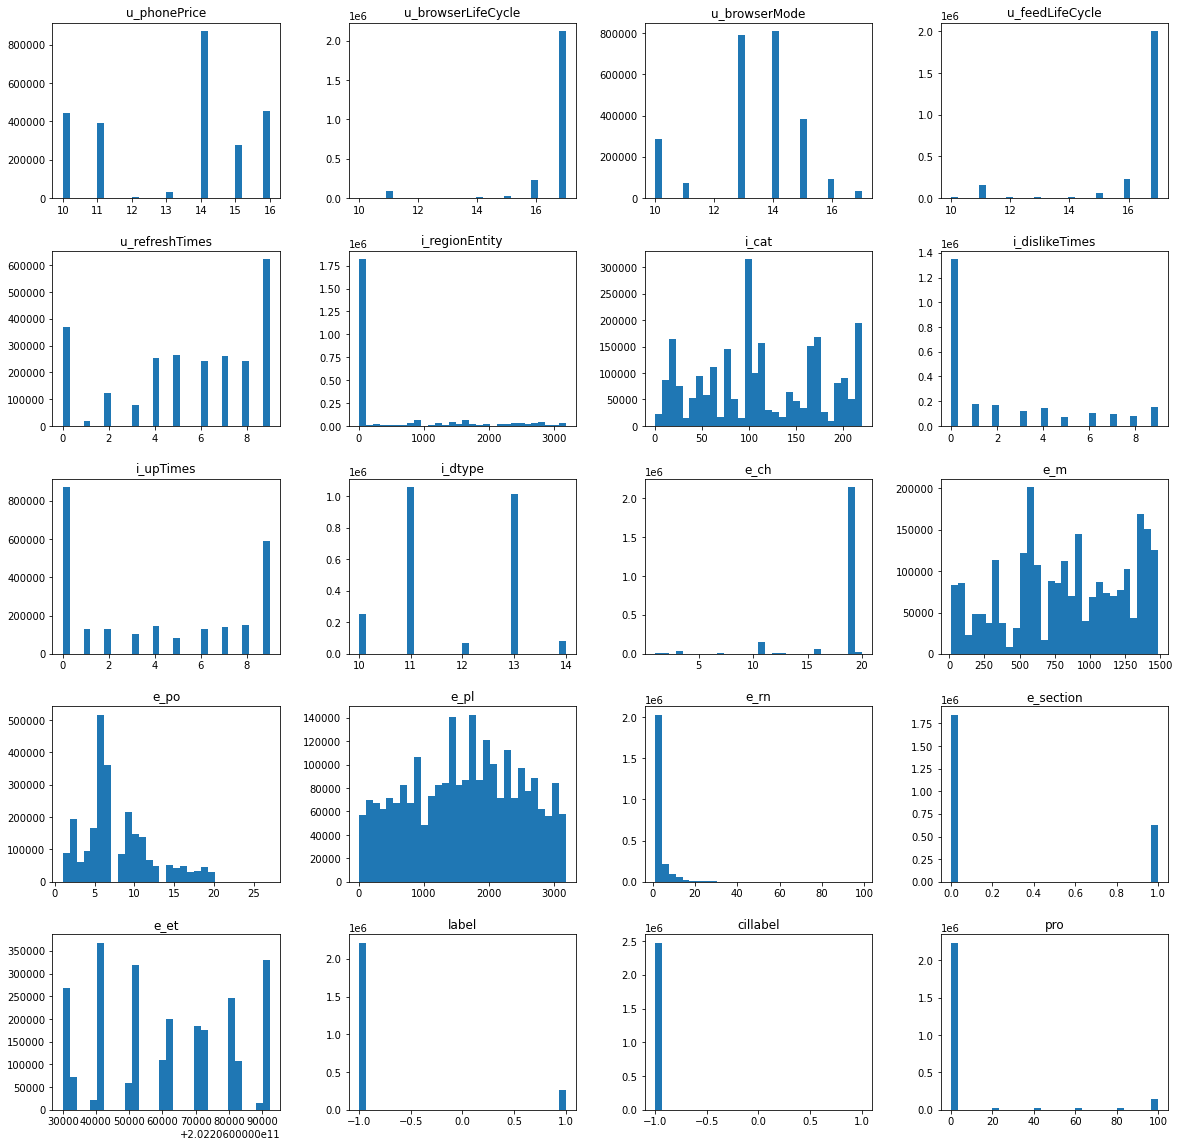

In [117]:
potential_customers_3 = potential_customers_2.drop(columns=['u_userId'])
potential_customers_3.hist(bins=30, figsize=(20, 20), grid=False)
plt.show()

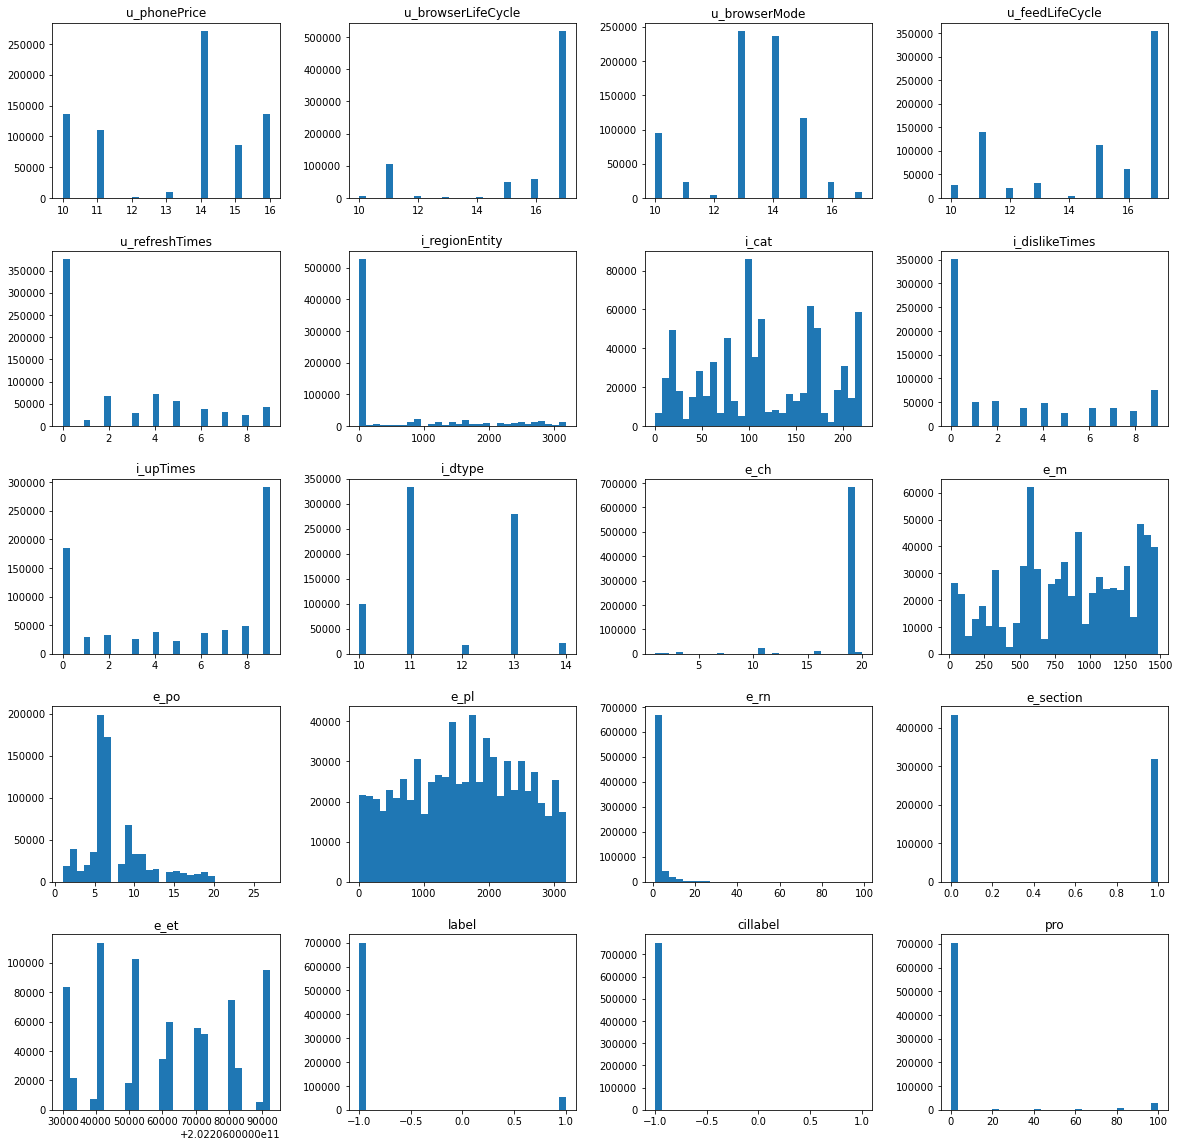

In [118]:
non_potential_customers_3 = non_potential_customers_2.drop(columns=['u_userId'])

columns_to_plot = ['u_browserMode', 'i_regionEntity', 'i_cat', 'i_dtype', 'e_ch', 'e_m', 'e_pl', 'e_section'
                   ,'label','cillabel','pro']

# 繪製直方圖
non_potential_customers_3.hist(bins=30, figsize=(20, 20), grid=False)
plt.show()

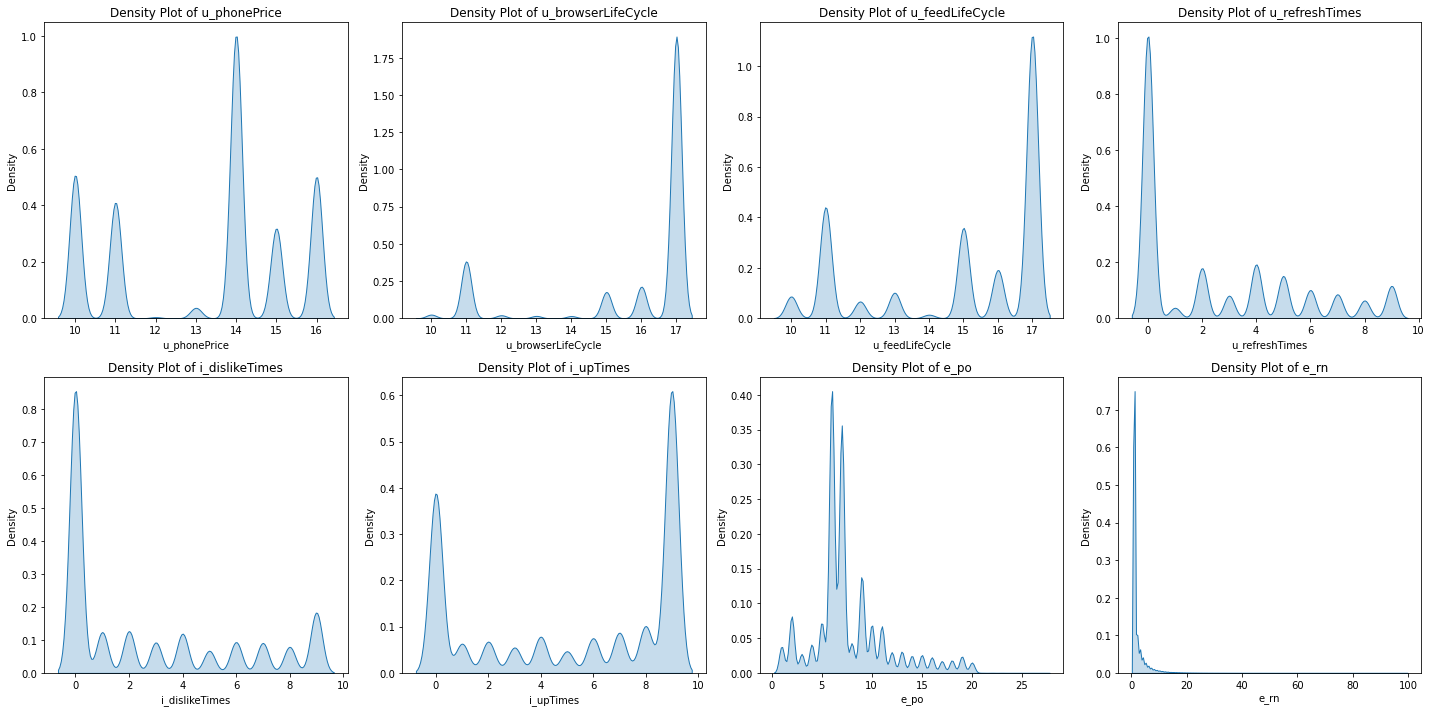

In [88]:
# 選擇特定的變數
columns_to_plot2 = ['u_phonePrice', 'u_browserLifeCycle','u_feedLifeCycle','u_refreshTimes','i_dislikeTimes','i_upTimes'
                    ,'e_po','e_rn']

# 設置圖形尺寸
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# 遍歷所有選定的變數，繪製密度圖
for i, column in enumerate(columns_to_plot2):
    ax = axes[i // 4, i % 4]  
    sns.kdeplot(data=non_potential_customers_2, x=column, fill=True, ax=ax)
    ax.set_title(f'Density Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

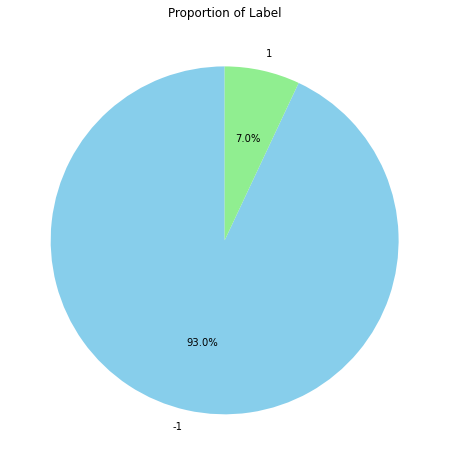

In [80]:
counts=non_potential_customers_2['label'].value_counts()

# 繪製圓餅圖
plt.figure(figsize=(8, 8))
counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Label')
plt.ylabel('')
plt.show()

In [89]:
non_potential_customers_2.corr()

,u_userId,u_phonePrice,u_browserLifeCycle,u_browserMode,u_feedLifeCycle,u_refreshTimes,i_regionEntity,i_cat,i_dislikeTimes,i_upTimes,i_dtype,e_ch,e_m,e_po,e_pl,e_rn,e_section,label,cillabel,pro
u_userId,1.000000,0.004622,0.004282,0.000031,0.003895,-0.011154,-0.001641,-0.003744,-0.002084,0.001942,-0.000965,-0.001978,0.003402,-0.001991,-0.012274,0.015865,0.003805,-0.000089,0.000822,-0.000936
u_phonePrice,0.004622,1.000000,-0.033303,0.037361,0.014684,-0.058018,-0.008057,0.000213,0.021783,0.024851,-0.001256,-0.002718,-0.048421,-0.005847,-0.003366,0.024877,-0.012305,0.001745,0.002693,0.001664
u_browserLifeCycle,0.004282,-0.033303,1.000000,0.024757,0.417006,0.333087,-0.038257,-0.002530,-0.125711,-0.146202,0.007703,-0.017699,-0.009080,-0.004664,0.000175,0.039340,-0.062175,0.037977,-0.001516,0.036263
u_browserMode,0.000031,0.037361,0.024757,1.000000,0.045412,-0.118405,-0.005777,-0.003767,0.004233,0.012922,-0.076559,0.002683,-0.060057,-0.009194,0.004163,-0.033915,0.053904,0.001403,-0.000379,0.001451
u_feedLifeCycle,0.003895,0.014684,0.417006,0.045412,1.000000,0.477655,-0.050338,-0.008202,-0.113736,-0.171362,0.022181,-0.050858,-0.010924,0.013222,-0.003952,0.066057,-0.163313,0.058511,0.000871,0.053774
u_refreshTimes,-0.011154,-0.058018,0.333087,-0.118405,0.477655,1.000000,-0.055241,-0.011752,-0.128661,-0.272231,0.094133,-0.140300,-0.003299,0.022672,0.003256,0.199979,-0.331819,0.089481,-0.002837,0.082984
i_regionEntity,-0.001641,-0.008057,-0.038257,-0.005777,-0.050338,-0.055241,1.000000,0.200423,-0.048782,-0.090162,0.145742,0.070947,0.001953,0.048608,0.009615,-0.012618,0.016532,-0.015272,-0.001016,-0.012325
i_cat,-0.003744,0.000213,-0.002530,-0.003767,-0.008202,-0.011752,0.200423,1.000000,-0.093498,-0.122835,0.078216,0.074992,0.007741,0.018207,-0.001124,-0.001574,-0.000368,-0.001628,-0.000538,-0.001726
i_dislikeTimes,-0.002084,0.021783,-0.125711,0.004233,-0.113736,-0.128661,-0.048782,-0.093498,1.000000,0.558040,0.025414,0.071612,-0.010937,0.119499,-0.002063,-0.029727,-0.182975,0.023679,0.002751,0.014957
i_upTimes,0.001942,0.024851,-0.146202,0.012922,-0.171362,-0.272231,-0.090162,-0.122835,0.558040,1.000000,-0.283062,0.197995,-0.011663,-0.030527,0.002630,-0.179988,0.300978,0.001569,0.002306,-0.011243


<AxesSubplot:>

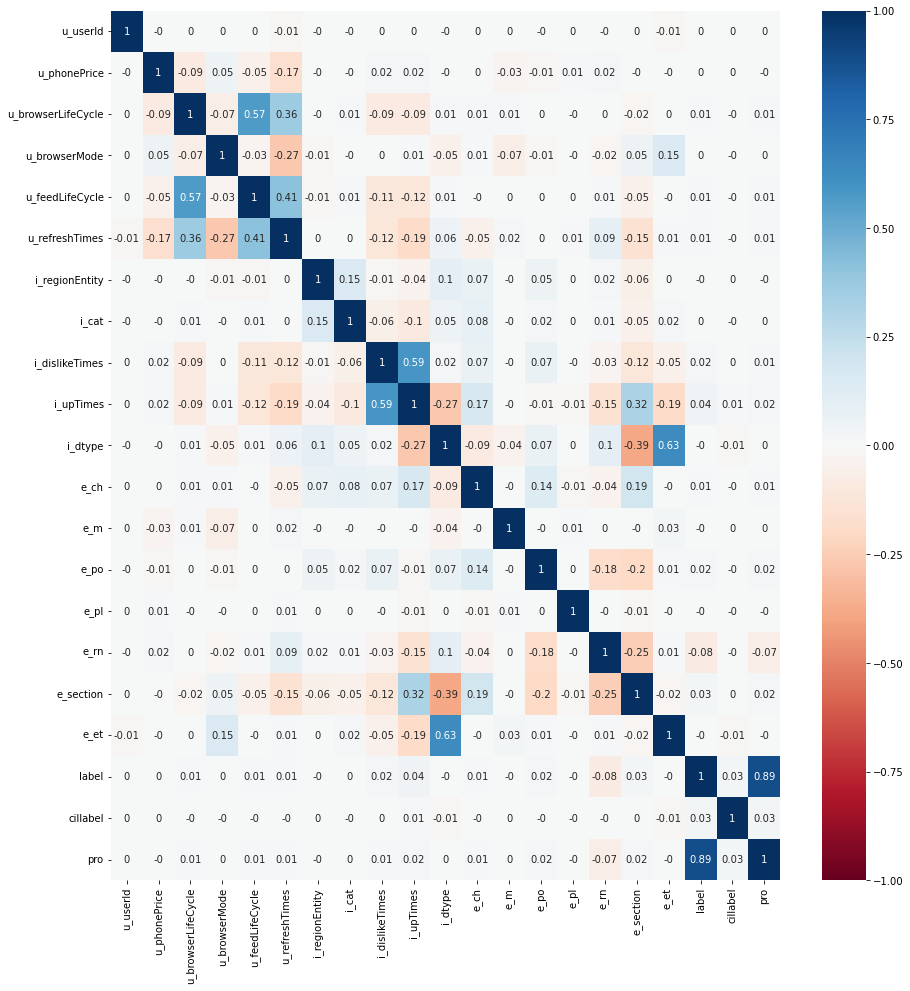

In [143]:
# 相關係數圖表化
vmin, vmax = -1, 1
fig, ax = plt.subplots(figsize=(15,16))
sns.heatmap(potential_customers_2.corr().round(2), annot=True, ax=ax, cmap='RdBu', vmin=vmin, vmax=vmax)

<AxesSubplot:>

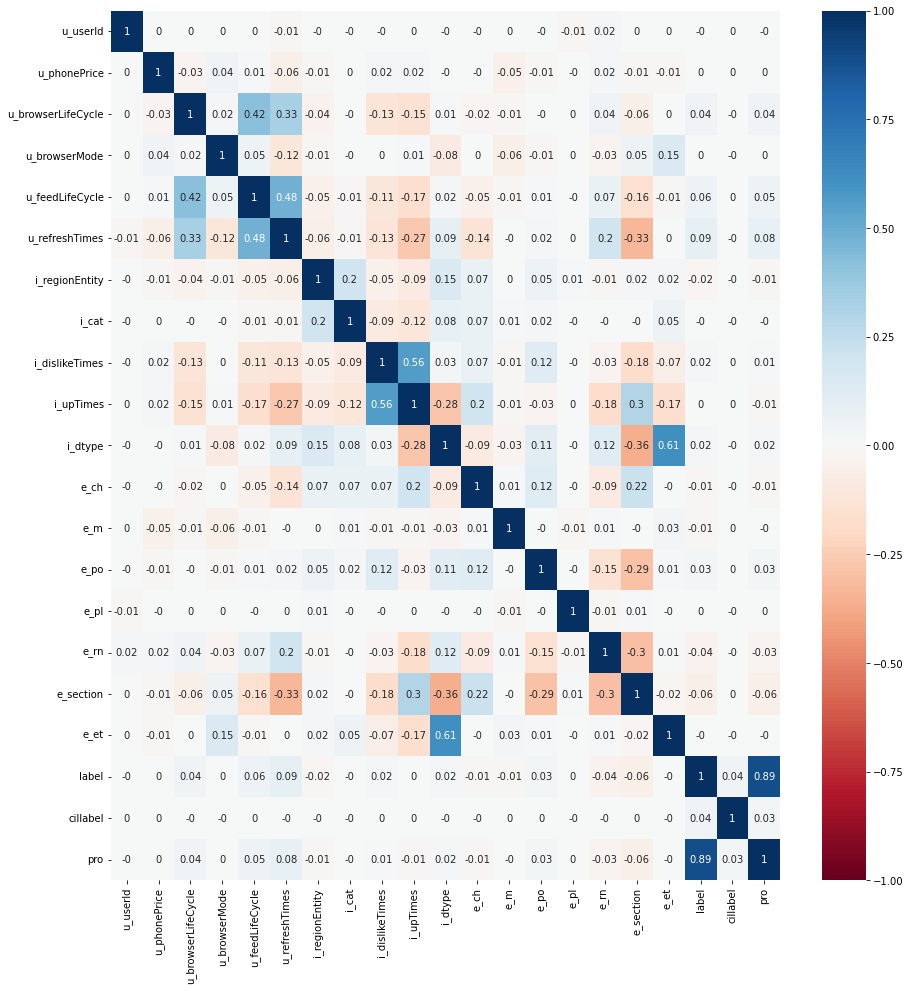

In [144]:
fig, ax = plt.subplots(figsize=(15,16))
sns.heatmap(non_potential_customers_2.corr().round(2), annot=True, ax=ax, cmap='RdBu',vmin=vmin, vmax=vmax)

In [4]:
# 基本摘要
non_potential_customers.info()
non_potential_customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751889 entries, 0 to 751888
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   u_userId              751889 non-null  int64 
 1   u_phonePrice          751889 non-null  int64 
 2   u_browserLifeCycle    751889 non-null  int64 
 3   u_browserMode         751889 non-null  int64 
 4   u_feedLifeCycle       751889 non-null  int64 
 5   u_refreshTimes        751889 non-null  int64 
 6   u_newsCatInterests    751889 non-null  object
 7   u_newsCatDislike      751889 non-null  object
 8   u_newsCatInterestsST  751889 non-null  object
 9   u_click_ca2_news      751889 non-null  object
 10  i_docId               751889 non-null  object
 11  i_s_sourceId          751889 non-null  object
 12  i_regionEntity        751889 non-null  int64 
 13  i_cat                 751889 non-null  int64 
 14  i_entities            729245 non-null  object
 15  i_dislikeTimes   

,u_userId,u_phonePrice,u_browserLifeCycle,u_browserMode,u_feedLifeCycle,u_refreshTimes,u_newsCatInterests,u_newsCatDislike,u_newsCatInterestsST,u_click_ca2_news,...,e_ch,e_m,e_po,e_pl,e_rn,e_section,e_et,label,cillabel,pro
0,135880,16,17,10,17,0,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,...,19,1217,1,561,2,0,202206081521,-1,-1,0
1,135880,16,17,10,17,0,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,...,19,1217,9,561,1,0,202206081521,-1,-1,0
2,135880,16,17,10,17,0,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,...,19,1217,18,561,1,0,202206081521,-1,-1,0
3,135880,16,17,10,17,0,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,...,19,1217,7,561,1,1,202206081521,-1,-1,0
4,135880,16,17,10,17,0,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,...,19,1217,7,561,2,0,202206081522,-1,-1,0


In [84]:
print(non_potential_customers.isnull().sum())

u_userId                    0
u_phonePrice                0
u_browserLifeCycle          0
u_browserMode               0
u_feedLifeCycle             0
u_refreshTimes              0
u_newsCatInterests          0
u_newsCatDislike            0
u_newsCatInterestsST        0
u_click_ca2_news            0
i_docId                     0
i_s_sourceId                0
i_regionEntity              0
i_cat                       0
i_entities              22644
i_dislikeTimes              0
i_upTimes                   0
i_dtype                     0
e_ch                        0
e_m                         0
e_po                        0
e_pl                        0
e_rn                        0
e_section                   0
e_et                        0
label                       0
cillabel                    0
pro                         0
dtype: int64


In [86]:
non_potential_customers_2.describe().T

,count,mean,std,min,25%,50%,75%,max
u_userId,751889.0,193523.278943,54193.888222,100001.0,146746.0,193445.0,240599.0,287184.0
u_phonePrice,751889.0,13.286928,2.142648,10.0,11.0,14.0,15.0,16.0
u_browserLifeCycle,751889.0,15.813466,2.176203,10.0,16.0,17.0,17.0,17.0
u_browserMode,751889.0,13.322755,1.601761,10.0,13.0,14.0,14.0,17.0
u_feedLifeCycle,751889.0,14.925685,2.501350,10.0,13.0,16.0,17.0,17.0
u_refreshTimes,751889.0,2.439985,2.955928,0.0,0.0,0.0,5.0,9.0
i_regionEntity,751889.0,529.393680,929.280628,0.0,0.0,0.0,879.0,3187.0
i_cat,751889.0,115.165717,62.981237,0.0,65.0,109.0,168.0,220.0
i_dislikeTimes,751889.0,2.698449,3.255674,0.0,0.0,1.0,5.0,9.0
i_upTimes,751889.0,5.259533,3.792545,0.0,1.0,7.0,9.0,9.0


In [150]:
ads_df = pd.read_csv('/Users/castle/Desktop/中研院/Data/train/train_data_ads.csv')

In [146]:
# 基本摘要
ads_df.info()
ads_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7675517 entries, 0 to 7675516
Data columns (total 35 columns):
 #   Column                Dtype  
---  ------                -----  
 0   log_id                int64  
 1   label                 int64  
 2   user_id               int64  
 3   age                   int64  
 4   gender                int64  
 5   residence             int64  
 6   city                  int64  
 7   city_rank             int64  
 8   series_dev            int64  
 9   series_group          int64  
 10  emui_dev              int64  
 11  device_name           int64  
 12  device_size           int64  
 13  net_type              int64  
 14  task_id               int64  
 15  adv_id                int64  
 16  creat_type_cd         int64  
 17  adv_prim_id           int64  
 18  inter_type_cd         int64  
 19  slot_id               int64  
 20  site_id               int64  
 21  spread_app_id         int64  
 22  hispace_app_tags      int64  
 23  app_sec

,log_id,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,...,ad_click_list_v001,ad_click_list_v002,ad_click_list_v003,ad_close_list_v001,ad_close_list_v002,ad_close_list_v003,pt_d,u_newsCatInterestsST,u_refreshTimes,u_feedLifeCycle
0,373250,0,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030326,39^220^16,0,15
1,373253,1,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030326,39^220^16,0,15
2,373252,1,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030326,39^220^16,0,15
3,373251,0,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030326,39^220^16,0,15
4,373255,0,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030328,39^220^16,0,15


In [147]:
print(ads_df.isnull().sum())
# 無缺失值

log_id                  0
label                   0
user_id                 0
age                     0
gender                  0
residence               0
city                    0
city_rank               0
series_dev              0
series_group            0
emui_dev                0
device_name             0
device_size             0
net_type                0
task_id                 0
adv_id                  0
creat_type_cd           0
adv_prim_id             0
inter_type_cd           0
slot_id                 0
site_id                 0
spread_app_id           0
hispace_app_tags        0
app_second_class        0
app_score               0
ad_click_list_v001      0
ad_click_list_v002      0
ad_click_list_v003      0
ad_close_list_v001      0
ad_close_list_v002      0
ad_close_list_v003      0
pt_d                    0
u_newsCatInterestsST    0
u_refreshTimes          0
u_feedLifeCycle         0
dtype: int64


In [151]:
columns_to_drop2 = ['ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003', 'ad_close_list_v001', 'ad_close_list_v002', 'ad_close_list_v003','u_newsCatInterestsST']
ads_df2 = ads_df.drop(columns_to_drop2, axis=1)

In [154]:
ads_df2.info()
ads_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7675517 entries, 0 to 7675516
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   log_id            int64  
 1   label             int64  
 2   user_id           int64  
 3   age               int64  
 4   gender            int64  
 5   residence         int64  
 6   city              int64  
 7   city_rank         int64  
 8   series_dev        int64  
 9   series_group      int64  
 10  emui_dev          int64  
 11  device_name       int64  
 12  device_size       int64  
 13  net_type          int64  
 14  task_id           int64  
 15  adv_id            int64  
 16  creat_type_cd     int64  
 17  adv_prim_id       int64  
 18  inter_type_cd     int64  
 19  slot_id           int64  
 20  site_id           int64  
 21  spread_app_id     int64  
 22  hispace_app_tags  int64  
 23  app_second_class  int64  
 24  app_score         float64
 25  pt_d              int64  
 26  u_refreshTimes

,log_id,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,...,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,pt_d,u_refreshTimes,u_feedLifeCycle
0,373250,0,100005,3,2,16,147,2,32,6,...,4,46,1,162,47,14,10.00,202206030326,0,15
1,373253,1,100005,3,2,16,147,2,32,6,...,4,37,1,344,20,13,10.00,202206030326,0,15
2,373252,1,100005,3,2,16,147,2,32,6,...,4,37,1,344,20,13,10.00,202206030326,0,15
3,373251,0,100005,3,2,16,147,2,32,6,...,4,47,1,152,49,17,10.00,202206030326,0,15
4,373255,0,100005,3,2,16,147,2,32,6,...,4,44,1,312,43,18,10.00,202206030328,0,15


In [158]:
ads_df2['device_size'].head(50)

0     2117
1     2117
2     2117
3     2117
4     2117
5     2117
6     1545
7     1545
8     2117
9     1545
10    2117
11    1230
12    2117
13    1186
14    2401
15    1186
16    2401
17    2401
18    2401
19    1186
20    1186
21    2401
22    1186
23    1186
24    1186
25    2401
26    2401
27    1186
28    2401
29    2401
30    1186
31    2117
32    1834
33    2117
34    2117
35    1834
36    1834
37    2401
38    2401
39    2401
40    2401
41    2401
42    2401
43    1186
44    2401
45    2401
46    2401
47    2401
48    2401
49    2401
Name: device_size, dtype: int64

In [153]:
ads_df2.nunique()

log_id              1176633
label                     2
user_id               65297
age                       8
gender                    3
residence                35
city                    341
city_rank                 4
series_dev               27
series_group              7
emui_dev                 27
device_name             256
device_size            1547
net_type                  6
task_id               11209
adv_id                12615
creat_type_cd             9
adv_prim_id             545
inter_type_cd             4
slot_id                  60
site_id                   1
spread_app_id           116
hispace_app_tags         43
app_second_class         20
app_score                 3
pt_d                   5436
u_refreshTimes           10
u_feedLifeCycle           8
dtype: int64

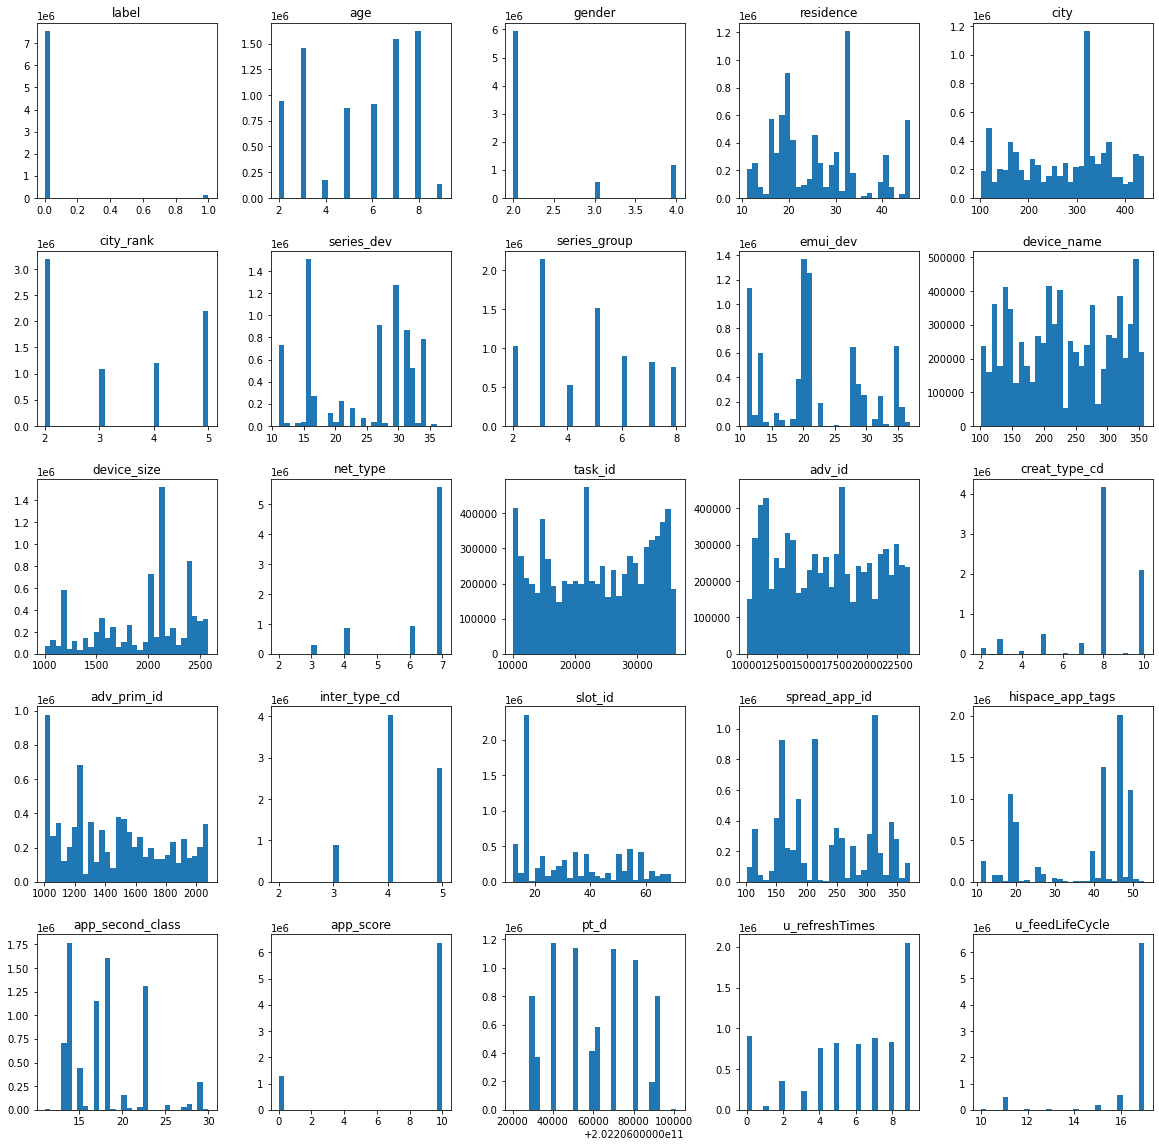

In [160]:
ads_df3 = ads_df2.drop(columns=['log_id','user_id','site_id'])
ads_df3.hist(bins=30, figsize=(20, 20), grid=False)
plt.show()

<AxesSubplot:>

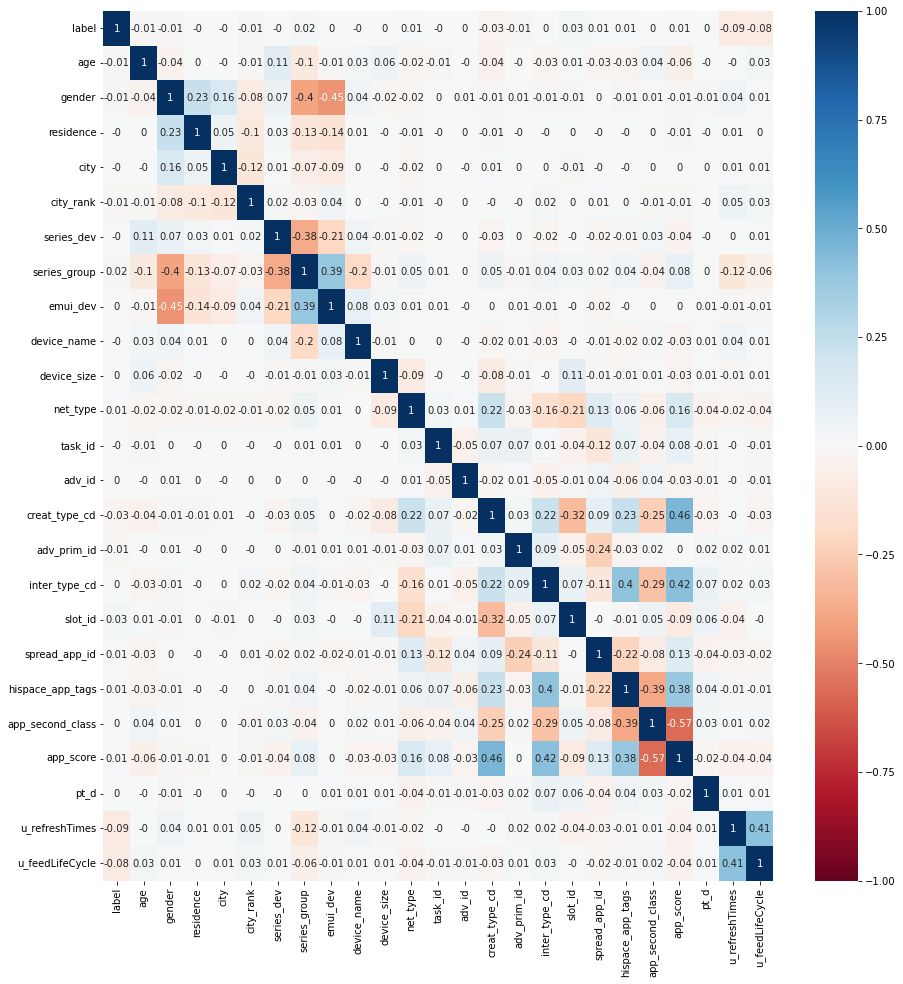

In [162]:
fig, ax = plt.subplots(figsize=(15,16))
sns.heatmap(ads_df3.corr().round(2), annot=True, ax=ax, cmap='RdBu',vmin=vmin, vmax=vmax)

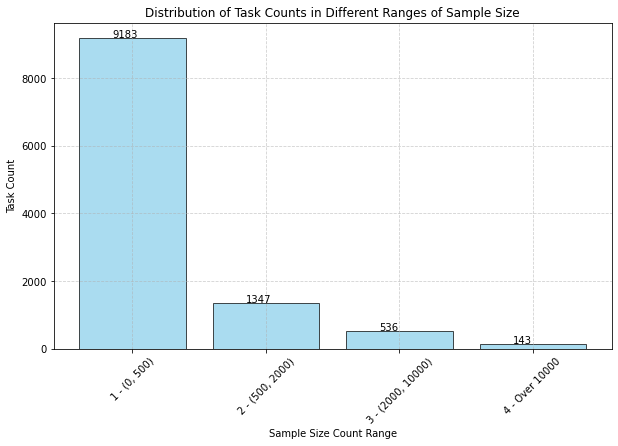

In [163]:
task_counts = ads_df2['task_id'].value_counts()
bins = [0, 500, 2000, 10000, float('inf')]
task_groups = pd.cut(task_counts, bins=bins)

# Solution 3.4

## Count the number of occurrences for each group
task_counts_by_group = task_groups.value_counts().sort_index()

# Solution 3.5

## Extract labels for the groups
group_labels = ['1 - (0, 500)', '2 - (500, 2000)', '3 - (2000, 10000)', '4 - Over 10000']

# Solution 3.6

## Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(group_labels, task_counts_by_group, color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Sample Size Count Range')
plt.ylabel('Task Count')
plt.title('Distribution of Task Counts in Different Ranges of Sample Size')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

## Add text labels above each bar
for bar, count in zip(bars, task_counts_by_group):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 20, str(count), fontsize=10)

plt.show()